<h1 align="center">Nanoestructura semiconductora 2D a temperatura absotulta T</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>

<h2>1. Importar librerías</h2>

In [1]:
import numpy as np
import pandas as pd
import scipy.constants as cte
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sympy.utilities.iterables import multiset_permutations

## 2. Planteamiento del problema

Sea un electrón confinado en una película delgada, con una probabilidad despreciable de encontrarse fuera de la misma.  Si se asume una región de confinamiento en forma de paralepípedo regular, como una caja con lados $L_x$, $L_y$ y $L_z$, en la cual se tiene energía potencial eléctrica igual a cero dentro de la caja e infinita en los bordes y fuera de la misma, calcular la energía a una temperatura absoluta $T$.

Como se supone que el electrón está en una película delgada de ancho menor a 100nm (nanoestructura 2D), se puede asumir que la función de onda que describe su estado depende solo de las coordinadas que describen dicha película $(x,y)$.  Entonces, la función de onda $\Psi _{n_{x}n_{y}}(x,y)$ para un electrón en una 
caja de potencial de lados $L_{x}$ y $L_{y}$ está dada por,

$$\Psi _{n_{x}n_{y}}(x,y)=\varphi _{n_{x}}(x)\vartheta _{n_{y}}(y)\qquad    (2)$$

Donde,

$$\varphi _{n_{x}}(x)=\sqrt{\frac{2}{L_{x}}}sen\left(\frac{n_{x}\pi 
}{L_{x}}x\right)\qquad(3)$$

$$\vartheta _{n_{y}}(y)=\sqrt{\frac{2}{L_{y}}}sen\left(\frac{n_{y}\pi}{L_{y}}y\right)\qquad (4)$$

La energía está determinada por los dos números cuánticos $n_{x}$ y $n_{y}$,

$$E_r = E_{n_{x}n_{y}}=\frac{\pi^{2}\hbar^{2}}{2m} \left( \frac{n_{x}^{2}}{L_{x}^{2}}+\frac{n_{y}^{2}}{L_{y}^{2}} \right)\qquad (5)$$

El valor esperado para la energía $\bar{E}$, a una cierta temperatura absoluta $T$, se puede calcular como $\bar{E} = -\frac{\partial ln(Z)}{\partial \beta}$, donde $Z = \sum_r e^{-\beta Er}$ es la función de partición, $\beta = k_B T$ y $k_B$, es la constante de Boltzmann.

$$Z = \sum_{n_x, n_y} e^{-\beta E_{n_{x}n_{y}}}$$

$$\bar{E} = \frac{1}{Z} \sum_{n_x, n_y} E_{n_{x}n_{y}} e^{-\beta E_{n_{x}n_{y}}} \qquad (5)$$

In [2]:
Lx = 100 # nm
Ly = 100 # nm
Lz = 10  # nm

N = 50 # número de puntos

m = 0.8 * cte.m_e  # Masa efectiva del electrón en metros

In [3]:
def phy_x(x, n_x):
    phy = np.sqrt(2.0/Lx)*np.sin(n_x*np.pi*x/Lx)
    phy[(x > Lx) | (x < 0)] = 0.0
    return phy

In [4]:
def theta_y(y, n_y):
    theta = np.sqrt(2.0/Ly)*np.sin(n_y*np.pi*y/Ly)
    theta[(y > Ly) | (y < 0)] = 0.0
    return theta

In [5]:
def Er(n_x, n_y, Lx=Lx, Ly=Ly, m=m): 
    return (np.pi*cte.hbar)**2 * ((n_x/(Lx*1e-9))**2 + (n_y/(Ly*1e-9))**2) / (2.0*m)

In [53]:
def mean_energy(T, num_states=30):
    beta = 1 / (cte.Boltzmann * T)
    nxs = np.arange(0, num_states)
    #all_ny = multiset_permutations(nx)
    #energy = [sum(np.exp(-beta*Er(nx, np.array(ny)))) for ny in all_ny]
    zrEr = 0
    zr = 0
    Z = 0
    for nx in nxs:
        for ny in nxs:
            zr = np.exp(-beta*Er(nx, ny))
            zrEr += zr * Er(nx, ny)
            Z += zr
    return zrEr / Z

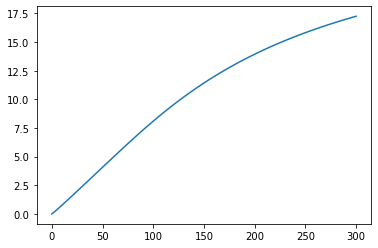

In [61]:
T = np.linspace(1e-3, 300, 100)
E_mean = np.array([mean_energy(this_T) for this_T in T])/cte.e
plt.plot(T, 1000*E_mean)

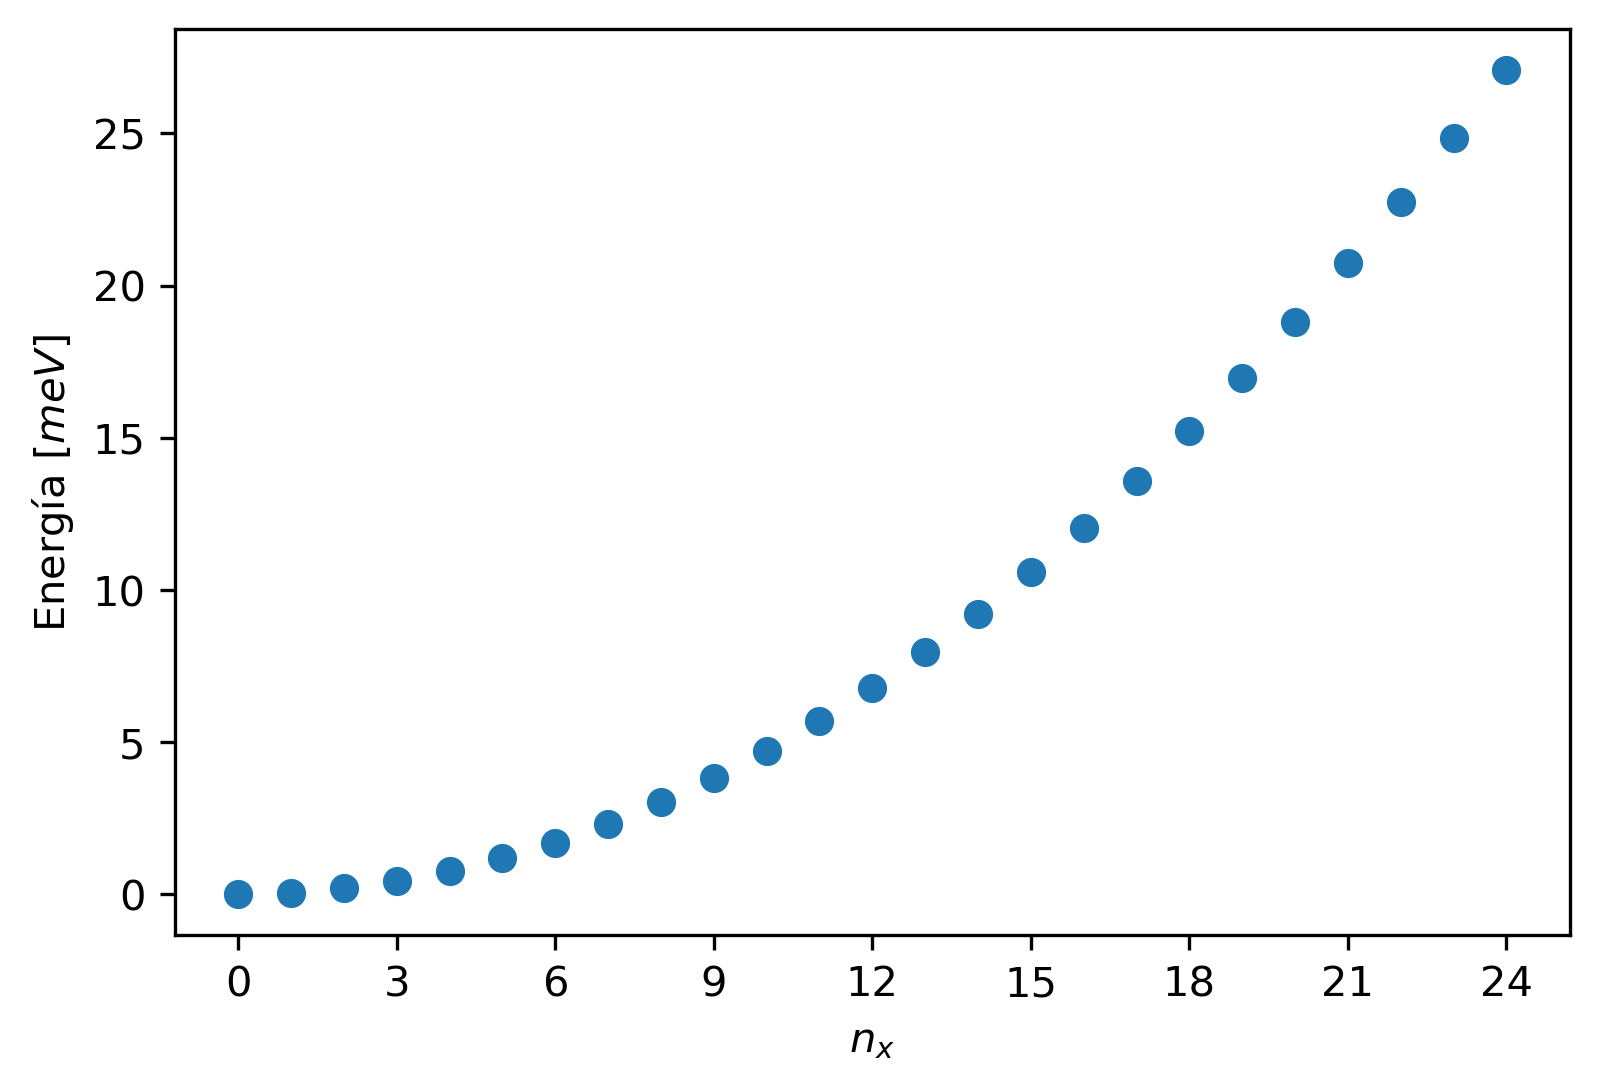

In [8]:
nx = np.arange(0, 25)
plt.figure(dpi=300)
plt.plot(nx, 1000 * Er(nx, 0)/cte.e, 'o')
plt.xlabel(r'$n_x$')
plt.ylabel(r'Energía $[m eV]$')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [9]:
delta_x = Lx/10.0
delta_y = Ly/10.0
x = np.linspace(-delta_x, Lx + delta_x, N)
y = np.linspace(-delta_x, Ly + delta_y, N)

xx, yy = np.meshgrid(x, y, sparse=True)
Psi_xy = lambda x, y, n_x, n_y: phy_x(x, n_x)*theta_y(y, n_y)

Er(1,2) = 3.77e-23 [J] = 0.235 [meV]


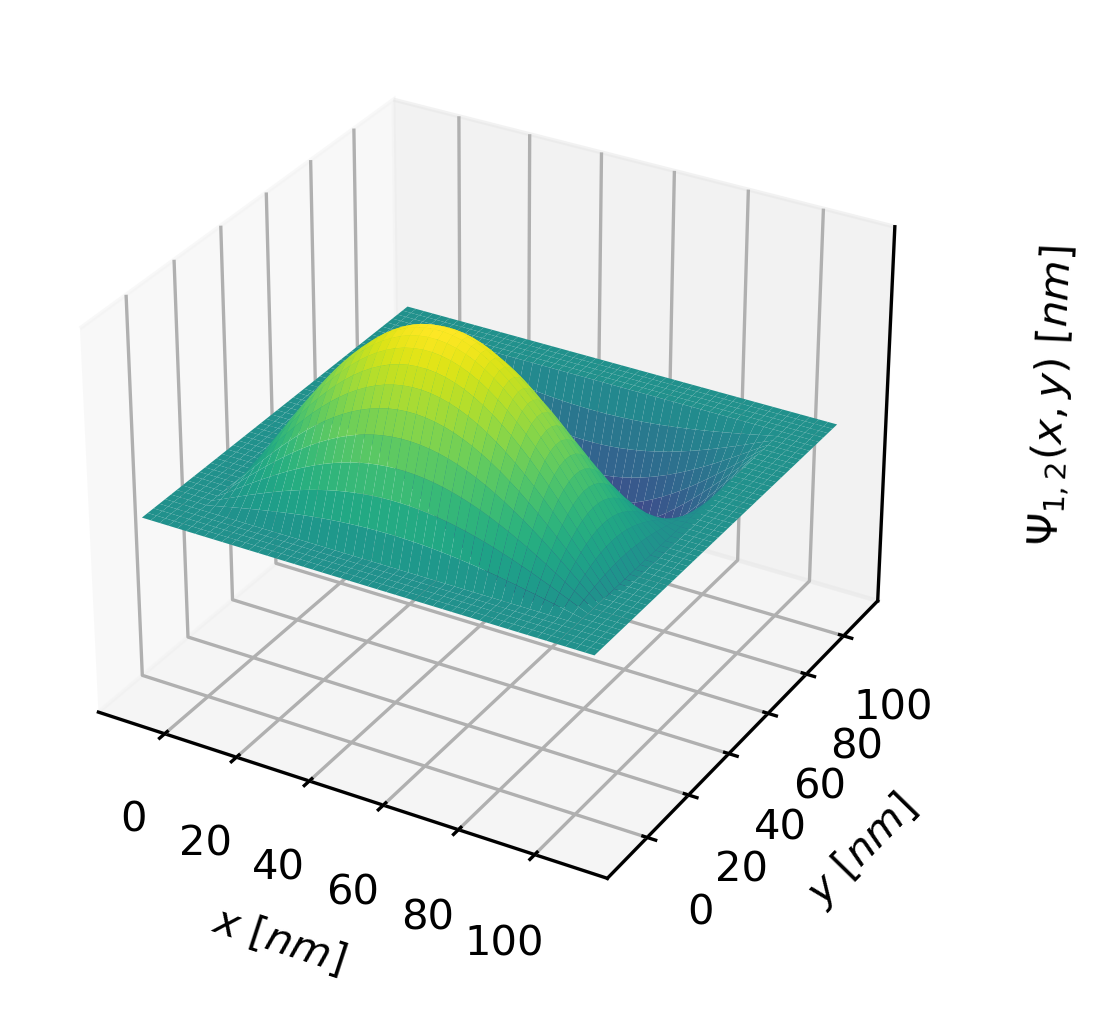

In [10]:
fig = plt.figure(dpi=300)
ax = fig.gca(projection='3d')

nx = 1
ny = 2
ax.plot_surface(xx, yy, Psi_xy(xx, yy, nx, ny), cmap='viridis', edgecolor='none')
ax.axes.set_xlabel(r'$x$ $[nm]$')
ax.axes.set_ylabel(r'$y$ $[nm]$')
ax.axes.set_zlabel(r'$\Psi_{%d,%d}(x,y)$ $[nm]$' % (nx, ny))
ax.axes.set_zticks([])
print('Er(%d,%d) = %0.3g [J] = %0.3g [meV]' % (nx, ny, Er(nx,ny), 1e3*Er(nx,ny)/cte.e))
plt.show()